
# **Lenet-5 Code**

In [ ]:
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D, AvgPool2D

from tensorflow import keras
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

x_train=x_train/255.0
x_val=x_val/255.0
x_test=x_test/255.0

In [ ]:
class LeNet(Sequential):
  def __init__(self,num_classes):
    super().__init__()

    self.add(Conv2D(6,5,strides=1,activation='tanh',input_shape=(28,28,1),padding='same'))
    self.add(AvgPool2D(2,strides=2))
    self.add(Conv2D(16,5,strides=1,activation='tanh'))
    self.add(AvgPool2D(2,strides=2))
    self.add(Conv2D(120,5,strides=1,activation='tanh'))
    self.add(Flatten())
    self.add(Dense(84,activation='tanh'))
    self.add(Dense(num_classes,activation='softmax'))

    self.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics='accuracy')

In [ ]:
model=LeNet(10)

model.summary()

Model: "le_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0    

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_cb = EarlyStopping(monitor='val_loss', mode='min',
                           verbose=1, patience=5)

# val_loss 가장 낮은 값을 가질때마다 모델 저장
check_point = ModelCheckpoint('best_model.h5',
                              monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [ ]:
history=model.fit(x_train,y_train,
          epochs=5,
          validation_data=(x_val,y_val),
          callbacks=[early_stopping_cb, check_point],
          )

Epoch 1/15
1500/1500 [==============================] - ETA: 0s - loss: 0.2519 - accuracy: 0.9240
Epoch 1: val_loss improved from inf to 0.14959, saving model to best_model.h5
1500/1500 [==============================] - 46s 30ms/step - loss: 0.2519 - accuracy: 0.9240 - val_loss: 0.1496 - val_accuracy: 0.9533
Epoch 2/15
1499/1500 [============================>.] - ETA: 0s - loss: 0.0973 - accuracy: 0.9698
Epoch 2: val_loss improved from 0.14959 to 0.09504, saving model to best_model.h5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0973 - accuracy: 0.9697 - val_loss: 0.0950 - val_accuracy: 0.9711
Epoch 3/15
1498/1500 [============================>.] - ETA: 0s - loss: 0.0661 - accuracy: 0.9800
Epoch 3: val_loss improved from 0.09504 to 0.07592, saving model to best_model.h5
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0661 - accuracy: 0.9800 - val_loss: 0.0759 - val_accuracy: 0.9761
Epoch 4/15
1499/1500 [============================>.] - ETA

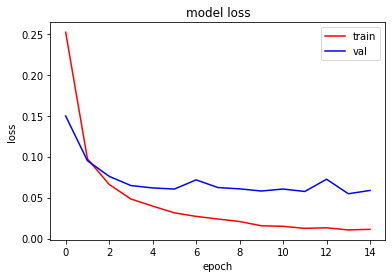

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper right')
# plt.show()

plt.plot(history.history['loss'], c='r')
plt.plot(history.history['val_loss'], c='b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()